# Portafolio de inversión

Un portafolio de inversión se define como el conjunto de diversos instrumentos financieros seleccionados y administrados con fundamentos sólidos para lograr generar rendimientos de una inversión. Tiene como objetivo reducir el riesgo mediante la diversificación de los activos y otorgar las mejores opciones a nuestros clientes. 
Al ser los tres miembros del equipo de Ingeniería financiera optamos un proyecto relacionado con ello. El portafolio se diseñará y tomará como base 5 de las empresas que mejor están cotizando actualmente en la bolsa.
Los datos serán extraídos de la página de internet Yahoo Finanzas.
Nuestra información tiene un horizonte de tiempo a corto plazo tanto para tomar los datos y analizarlos como para llevar a cabo la simulación que dicho sea de paso será de un año, los datos se tomarán desde 1 de enero de 2018 al 31 de Diciembre de 2019. Es indispensable el mencionar la importancia que tiene este proyecto en nuestro campo laboral dado que esto lo podriamos implementar en un futuro.

# Objetivos

# Objetivos Generales
> - Crearemos un portafolio de inversión utilizando las acciones más activas del momento, cotizadas en el mercado de valores.

# Objetivos Específicos

> - Lograr crear el portafolio a través del análisis de los rendimientos de las acciones seleccionadas con ayuda de la simulación Montecarlo y sus respectivas gráficas. 

> - Buscar una solución desde el punto de vista bursátil en caso de que los rendimientos de la simulación no sean los deseados.

> - Establecer un rendimiento similar al que se ha sugerido en simulaciones de la bolsa que hemos llevado a cabo en otros cursos.

> - Hacer el número de simulaciones necesarias para lograr tener tanto una simulación Montecarlo como un escenario adecuado.

# Modela que presenta el problema

A continuación no sólo se mostrará tanto la media como la desvación de cada uno de las empresas en el periodo mencionado sino que también es oportuno el ver graficamente el comportamiento de las acciones de las empresas, para esto importaremos las librerías que se mencionan a continuación.

### Utilizaremos las acciones más activas al momento:
    'GE': General Motors
    'OXY': Occidental Petroleum Company
    'BAC': Bank of America Corporation
    'AMD': Advanced Micro Devices  
      'F': Ford Motor Company  

In [17]:
# Librerías
import numpy as np # Librería numérica
import matplotlib.pyplot as plt # Para graficar
%matplotlib inline
import pandas as pd # Para crear tablas e importar datos de archivos csv
import pandas_datareader.data as web # Para importar datos desde la web

In [18]:
def get_closes(names,start_date,end_date):
    return web.DataReader(names,'yahoo',start_date,end_date)['Adj Close']

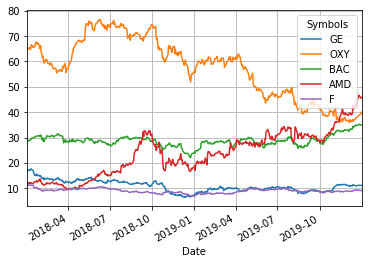

In [20]:
# Obtenemos los datos de las acciones
names=['GE','OXY','BAC','AMD','F']
start_date='2018-01-01'
end_date='2019-12-31'
data=get_close(names,start_date,end_date)
data.plot(grid=True)

In [21]:
data.shift()

Symbols,GE,OXY,BAC,AMD,F
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,16.709501,64.420486,28.525099,10.980000,10.823255
2018-01-04,16.867491,65.308685,28.429695,11.550000,10.908747
2018-01-05,17.220642,65.273849,28.801765,12.120000,11.096828
2018-01-08,17.229935,64.916824,28.935326,11.880000,11.284911
...,...,...,...,...,...
2019-12-24,11.148929,38.542057,34.947010,45.459999,9.282141
2019-12-26,11.178899,38.716763,34.996696,46.540001,9.311640
2019-12-27,11.218859,38.969116,35.294796,46.630001,9.291973


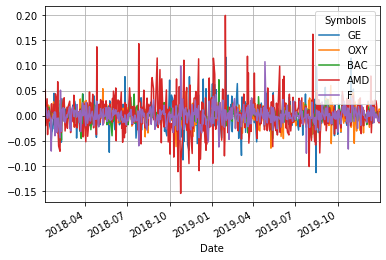

In [22]:
# Obtención de rendimientos
r=data.pct_change().dropna()
r.plot(grid=True)

Una vez obtenidos los rendimientos diarios de los años previos podemos mediante el uso de las funciones mean y std sacar tanto la media como la desviación estándar.

In [23]:
mu=r.mean()
sigma=r.std()

In [24]:
mu

Symbols
GE    -0.000485
OXY   -0.000797
BAC    0.000521
AMD    0.003521
F     -0.000186
dtype: float64

In [25]:
sigma

Symbols
GE     0.025412
OXY    0.017396
BAC    0.015103
AMD    0.036829
F      0.017341
dtype: float64

Como podemos ver, los valores de la media para e de las 5 impresas son valores negativos, por ende podemos ir deduciendo que muy probablemente la simulación de los rendimientos que se hará no será muy favorable, para llevar a cabo dicha simulación se involucrarán diversas varaible como lo son el tiempo, la media y la desviación estándar. Una de las limitantes que manejan este tipo de modelos es que no deja de ser una simulación, claramente hay otros factores en la realidad que no podemos controlar, estos van desde el desplome de Wall Street o inclusive la situación que vivimos hoy en día con el Covid-19, son ejemplos de situaciones que no se pueden tomar en cuenta en el modelo matemático o por lo menos no todavía.

# Solución del problema de optimización

En esta parte veremos el como solucionamos el problema por medio de simulación Montecarlo y el uso de diversas funciones, obtendremos simulaciones de 365 días en 100 escenarios diferentes, eso proceso es idóneo dado que simularemos en el periodo de tiempo en que se supone haríamos la inversión. Dicho proceso se repetirá 5 veces, 1 para cada empresa.

In [26]:
# Función que simula varios escenarios de rendimientos diarios
def sim_r(mu,sigma,start_date,ndays,N):
    dates=pd.date_range(start_date,periods=ndays,freq='D')
    return pd.DataFrame(index=dates,data=mu+sigma*np.random.randn(ndays,N))

In [36]:
# Simulamos 100 escenarios para un año
sim_GE=sim_r(mu['GE'],sigma['GE'],'2020-01-01',365,100)
sim_GE

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,-0.003388,0.012715,-0.054735,-0.025455,-0.022175,0.052710,0.022174,0.020784,-0.014222,-0.031912,...,-0.032565,0.001507,0.033412,-0.042108,-0.018853,-0.017255,0.023089,-0.007377,-0.005970,-0.016373
2020-01-02,0.032660,-0.007921,-0.000423,-0.017811,-0.031222,0.044775,0.018457,-0.001194,-0.011733,0.022270,...,0.015466,-0.005642,-0.012037,-0.003861,-0.029002,-0.045374,-0.028372,0.053857,-0.014014,0.027671
2020-01-03,-0.031607,-0.008545,0.030666,-0.029347,0.015861,-0.027899,0.016243,-0.029868,-0.003413,-0.026258,...,0.021925,-0.015879,-0.019706,-0.008550,0.006852,-0.018185,0.028845,0.044290,0.058544,-0.021257
2020-01-04,-0.031159,0.011445,-0.029733,-0.004688,-0.038606,-0.024529,-0.009728,-0.030464,-0.020064,0.005506,...,-0.006192,-0.051407,0.005465,0.015086,-0.074996,0.005239,0.065824,-0.057610,-0.048292,0.000085
2020-01-05,0.017859,0.014674,0.028124,0.011668,0.001012,-0.002178,-0.024792,0.011799,-0.036446,-0.029068,...,-0.012625,0.024524,0.004049,0.042980,-0.044634,0.013983,0.013810,-0.012238,-0.013156,-0.028105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.042291,0.017610,-0.032872,-0.027099,0.036331,0.005024,0.019860,0.017325,0.025662,-0.016324,...,0.025921,0.002941,-0.022624,0.034856,0.010566,0.026949,-0.008784,-0.004308,-0.034152,0.010275
2020-12-27,-0.018019,0.004232,0.010085,0.024188,-0.007842,-0.012888,0.011033,-0.008166,-0.007193,-0.004379,...,0.002636,-0.019784,0.022475,-0.025070,-0.019009,0.037355,-0.039842,-0.014053,0.028487,-0.051144
2020-12-28,-0.039156,0.020115,0.008544,-0.010414,0.001273,-0.023414,-0.007847,0.019765,-0.019886,0.012260,...,-0.001489,-0.003683,0.030019,0.040880,-0.013573,0.005730,0.001421,0.006007,-0.023570,-0.063794
2020-12-29,-0.002344,-0.025453,0.021296,-0.075483,0.017994,0.007331,-0.009844,-0.024866,0.054040,-0.007230,...,0.009010,-0.019948,0.005766,-0.049613,-0.014306,-0.064406,0.036048,-0.026055,0.009132,-0.039036


In [35]:
sim_OXY=sim_r(mu['OXY'],sigma['OXY'],'2020-01-01',365,100)
sim_OXY

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,0.007295,-0.013163,0.011321,0.018372,0.026007,-0.002423,-0.008621,0.013371,0.024611,-0.007626,...,0.012607,-0.070390,0.003304,-0.000349,0.017226,0.006391,0.003272,-0.003731,0.003564,-0.020124
2020-01-02,-0.034489,-0.036334,0.014881,0.040747,0.011309,0.015853,0.036349,0.019691,-0.025713,0.017123,...,0.019031,-0.008124,-0.016471,0.004061,-0.024354,-0.007617,-0.030423,0.006832,0.024142,0.044313
2020-01-03,0.021609,0.019592,0.018153,-0.019769,0.016967,-0.002840,0.015842,-0.019224,0.001709,-0.018041,...,-0.008858,-0.003732,0.013398,-0.001783,0.033898,-0.013147,-0.014976,-0.008012,-0.009592,0.017779
2020-01-04,0.012365,0.008926,-0.033301,-0.012805,0.027180,0.002884,-0.008630,0.022086,0.016567,0.005271,...,0.012669,0.003682,-0.023537,0.023108,-0.000921,0.016092,-0.020891,-0.013604,-0.018276,0.019114
2020-01-05,-0.010674,0.019682,-0.027051,-0.012330,0.014167,0.017254,0.016212,0.011248,-0.005156,-0.000466,...,0.030685,-0.005598,-0.002408,0.009593,0.006362,-0.037277,0.011567,0.018152,0.007032,-0.005235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.047273,0.018003,0.016624,0.029066,0.013523,-0.005046,0.007130,0.028714,0.007726,-0.013282,...,-0.007913,-0.012724,0.013685,0.021852,-0.012357,-0.014399,-0.006604,-0.011283,-0.008279,-0.018771
2020-12-27,-0.011651,0.006882,0.011529,0.029515,-0.005067,-0.014622,-0.016245,0.000627,-0.013651,0.029856,...,0.013402,0.013457,-0.025650,0.018747,0.016501,0.016887,-0.025545,-0.009094,-0.022820,-0.001990
2020-12-28,-0.013740,-0.028071,0.017913,0.030954,0.036393,0.012279,-0.026738,-0.025310,-0.011209,-0.036580,...,-0.032923,-0.022665,-0.008428,-0.014549,0.008978,-0.005078,0.005782,0.002954,0.022765,0.016409
2020-12-29,-0.011295,0.003307,-0.009497,-0.013745,-0.003493,0.006542,-0.022291,-0.022833,0.023603,-0.036961,...,0.018652,-0.009879,0.009295,-0.025996,0.002441,0.035323,-0.000553,-0.011703,0.023884,0.022156


In [34]:
sim_BAC=sim_r(mu['BAC'],sigma['BAC'],'2020-01-01',365,100)
sim_BAC

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,-0.001598,-0.006909,0.002186,0.006640,0.020725,-0.009615,-0.001629,0.020739,-0.029439,0.007461,...,0.025506,0.023405,0.008610,0.012960,0.044815,-0.014932,-0.004326,0.013605,-0.002628,0.011375
2020-01-02,0.001331,0.015986,-0.017345,0.013568,-0.008482,0.009645,0.022381,-0.014055,-0.005405,-0.027068,...,-0.007782,-0.019272,0.001648,0.000018,-0.003853,-0.024113,0.001307,-0.041217,-0.005381,-0.001831
2020-01-03,-0.007739,-0.011842,-0.036472,-0.005491,0.008771,0.013481,-0.008069,0.043530,-0.012873,0.012041,...,-0.006051,0.000558,0.023422,0.007294,-0.030947,0.005027,0.025329,-0.009391,0.003743,0.019830
2020-01-04,-0.000195,0.011660,-0.008212,0.011222,-0.010925,-0.009564,-0.003572,0.009483,0.006351,-0.000804,...,-0.015050,0.016732,-0.012049,0.008320,-0.022141,-0.003074,0.001979,0.015101,0.013294,0.000199
2020-01-05,-0.022003,0.012489,0.020341,0.011552,0.002609,0.007572,0.009560,0.022016,0.024226,-0.002667,...,0.002816,0.003608,0.003784,-0.012050,-0.011267,-0.035187,0.000633,-0.015775,-0.005677,0.004444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.010916,-0.006396,-0.005214,0.008729,0.000926,-0.001183,0.008387,-0.013881,0.005834,0.010921,...,0.000983,0.011622,0.006504,0.008871,-0.030413,0.019268,-0.007696,0.021660,-0.000660,-0.006247
2020-12-27,0.001945,0.008010,0.010305,0.010081,-0.001345,-0.001519,-0.001570,0.000284,-0.026312,-0.011769,...,-0.007009,0.011762,0.033352,-0.012680,0.015232,0.005098,0.012167,-0.007664,-0.007634,-0.004866
2020-12-28,-0.021054,0.001921,0.011118,0.007016,-0.029975,-0.003262,-0.000401,0.008757,-0.022296,0.008150,...,0.004807,-0.006821,-0.000298,-0.006788,0.014231,0.012226,0.023694,-0.004912,-0.026463,-0.002960
2020-12-29,0.031176,-0.002658,0.001342,0.008048,0.020492,0.002526,0.024387,-0.015947,-0.023369,-0.009744,...,0.002778,0.012011,0.010219,-0.013617,0.009523,0.001816,-0.005685,-0.013744,0.003582,0.002167


In [33]:
sim_AMD=sim_r(mu['AMD'],sigma['AMD'],'2020-01-01',365,100)
sim_AMD

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,-0.016183,0.008378,-0.007243,-0.050337,0.018000,-0.050901,-0.007333,-0.001710,0.000882,0.029894,...,-0.029068,0.023608,0.029632,-0.083946,0.015024,0.052973,0.072402,-0.027608,-0.016787,-0.033226
2020-01-02,0.044530,-0.011326,-0.052321,-0.038979,0.003719,-0.004596,0.012347,-0.041751,0.035954,0.038313,...,-0.046412,0.058618,-0.003375,0.003203,0.014983,0.050858,0.031315,0.003395,0.033026,0.017666
2020-01-03,-0.011585,-0.027523,0.002153,0.012003,-0.038165,-0.016430,-0.044091,-0.007205,-0.072597,0.044082,...,-0.007657,0.027562,0.035597,0.014610,-0.007990,-0.080910,0.026329,-0.003649,-0.015882,-0.004616
2020-01-04,-0.026261,-0.007082,0.021055,0.031759,-0.016665,-0.003792,0.023016,-0.008234,0.026517,-0.037477,...,0.019082,-0.013343,-0.007771,-0.006875,0.014460,0.029434,-0.024554,-0.002511,-0.010626,-0.017590
2020-01-05,-0.032516,0.061843,0.046039,0.061549,-0.009367,-0.057908,-0.035929,0.045358,0.042709,0.013373,...,0.064471,-0.022144,-0.019675,0.015862,-0.018247,0.041367,0.034980,0.038605,-0.018033,0.019187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.018310,-0.024183,-0.047920,0.015516,-0.014345,0.015347,0.000822,0.016579,-0.045243,0.015589,...,-0.025677,-0.029626,0.015499,0.033638,-0.020471,0.002856,-0.003234,0.000544,0.040798,-0.032735
2020-12-27,-0.042554,-0.002575,0.051393,0.067806,0.027133,-0.015587,-0.007244,-0.005137,0.029630,0.026744,...,-0.022121,0.007522,-0.022622,0.036518,0.034135,0.023465,0.009691,0.073178,-0.009963,0.009456
2020-12-28,0.055632,-0.002074,0.036244,0.026747,0.031230,-0.000822,-0.005691,0.071829,-0.007975,-0.024799,...,0.044328,0.004848,-0.042184,0.034680,0.051441,-0.024361,-0.053266,-0.063775,0.089045,-0.026241
2020-12-29,0.059513,-0.022700,-0.049362,0.013786,0.033718,0.059072,0.020035,-0.002053,0.011781,0.011801,...,0.031241,-0.015203,0.026773,0.010699,0.052590,-0.017610,0.030385,0.055618,0.013093,0.029238


In [32]:
sim_F=sim_r(mu['F'],sigma['F'],'2020-01-01',365,100)
sim_F

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,0.014977,0.028714,0.022381,-0.011637,-0.013230,-0.007874,0.021380,-0.002759,0.016810,0.011796,...,-0.007574,0.015920,-0.048798,0.016617,0.000986,-0.007199,0.010683,0.004070,-0.005621,-0.015622
2020-01-02,-0.020643,-0.021090,0.010813,0.004706,-0.035311,-0.032832,0.034275,0.028135,0.006839,0.019200,...,-0.006630,0.009003,-0.008853,-0.027727,0.014751,0.008929,0.016525,-0.002279,0.022201,0.002395
2020-01-03,-0.011932,-0.009108,-0.002845,0.010721,-0.018880,0.000205,0.023198,-0.009963,-0.010725,0.001556,...,0.010481,-0.028640,-0.019767,0.009536,-0.024462,0.018981,0.013973,0.031855,-0.028279,-0.009363
2020-01-04,-0.011801,-0.008649,-0.009927,-0.007548,0.022014,-0.026221,-0.027926,-0.025883,-0.016036,-0.007333,...,-0.019266,0.009949,-0.006959,-0.004698,-0.017186,0.007942,-0.011782,-0.011878,-0.011785,-0.011876
2020-01-05,0.004289,-0.005226,0.007372,-0.021953,0.000345,-0.024211,0.015418,0.010186,-0.003386,-0.001687,...,0.002045,-0.002949,-0.011321,-0.008122,0.012420,0.002224,-0.010271,-0.001706,-0.024315,-0.015948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.024026,0.024664,0.002191,-0.019870,-0.005196,-0.016906,-0.010501,0.005579,-0.009367,-0.001206,...,-0.048464,0.011485,0.014136,0.012990,-0.010084,0.001617,-0.008735,0.043850,0.009470,-0.003372
2020-12-27,0.002399,0.000552,0.014163,-0.032098,0.021929,-0.033496,-0.004142,-0.000947,0.008021,0.011099,...,0.028195,-0.015874,-0.008820,-0.024417,-0.040673,-0.008564,-0.013972,0.026764,-0.011381,0.011353
2020-12-28,0.011982,-0.000558,0.007684,0.000954,-0.027745,-0.009971,0.014987,0.013122,0.008605,0.013550,...,0.004967,0.004761,-0.001037,-0.027119,0.016408,0.018197,0.025786,0.031194,-0.006080,0.002223
2020-12-29,0.037574,0.008891,0.008473,-0.035160,-0.016656,0.028656,-0.009744,0.018110,-0.017243,0.004518,...,0.007063,-0.000422,0.010936,-0.005910,0.008199,-0.020715,0.010643,0.014993,0.023795,0.020584


In [37]:
#Ahora calcularemos los precios al cierre
simCloses_GE=data['GE'].iloc[-1]*(1+sim_GE).cumprod()
simCloses_GE

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,11.111154,11.290691,10.538688,10.865128,10.901704,11.736591,11.396142,11.380649,10.990371,10.793145,...,10.785863,11.165730,11.521436,10.679468,10.938735,10.956554,11.406348,11.066683,11.082368,10.966389
2020-01-02,11.474049,11.201261,10.534233,10.671606,10.561332,12.262101,11.606485,11.367065,10.861424,11.033507,...,10.952675,11.102731,11.382757,10.638231,10.621491,10.459406,11.082731,11.662700,10.927061,11.269838
2020-01-03,11.111388,11.105540,10.857274,10.358424,10.728845,11.920001,11.795013,11.027550,10.824359,10.743785,...,11.192808,10.926435,11.158448,10.547270,10.694264,10.269207,11.402410,12.179236,11.566780,11.030273
2020-01-04,10.765172,11.232640,10.534450,10.309861,10.314649,11.627621,11.680272,10.691605,10.607178,10.802945,...,11.123507,10.364738,11.219427,10.706383,9.892239,10.323003,12.152956,11.477593,11.008194,11.031213
2020-01-05,10.957424,11.397467,10.830716,10.430160,10.325085,11.602295,11.390690,10.817751,10.220593,10.488924,...,10.983073,10.618919,11.264853,11.166548,9.450706,10.467346,12.320787,11.337128,10.863366,10.721181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,5.888605,4.255940,9.847485,8.279461,6.824468,15.049689,7.817821,8.289167,4.904021,7.251367,...,2.434603,7.132461,7.167622,7.457983,14.740990,6.416043,9.496300,7.959743,7.725049,9.012110
2020-12-27,5.782499,4.273950,9.946794,8.479725,6.770949,14.855730,7.904078,8.221477,4.868747,7.219615,...,2.441020,6.991350,7.328716,7.271013,14.460778,6.655715,9.117948,7.847886,7.945109,8.551196
2020-12-28,5.556077,4.359920,10.031775,8.391418,6.779570,14.507895,7.842053,8.383973,4.771926,7.308127,...,2.437384,6.965601,7.548714,7.568252,14.264498,6.693850,9.130908,7.895030,7.757840,8.005677
2020-12-29,5.543055,4.248946,10.245411,7.758006,6.901560,14.614256,7.764857,8.175496,5.029801,7.255286,...,2.459346,6.826650,7.592238,7.192766,14.060436,6.262724,9.460058,7.689327,7.828685,7.693164


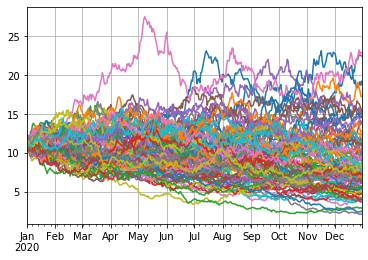

In [42]:
simCloses_GE.plot(grid=True,legend=False)

In [38]:
simCloses_OXY=data['OXY'].iloc[-1]*(1+sim_OXY).cumprod()
simCloses_OXY

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,40.289737,39.471430,40.450747,40.732767,41.038160,39.901039,39.653118,40.532741,40.982329,39.692919,...,40.502210,37.182477,40.130095,39.983976,40.686934,40.253550,40.128833,39.848695,40.140494,39.193029
2020-01-02,38.900167,38.037271,41.052691,42.392507,41.502278,40.533594,41.094488,41.330881,39.928530,40.372580,...,41.273022,36.880403,39.469102,40.146358,39.696046,39.946928,38.908001,40.120936,41.109551,40.929793
2020-01-03,39.740756,38.782479,41.797938,41.554448,42.206444,40.418481,41.745521,40.536343,39.996763,39.644205,...,40.907440,36.742754,39.997902,40.074762,41.041679,39.421765,38.325302,39.799478,40.715213,41.657481
2020-01-04,40.232147,39.128642,40.406006,41.022361,43.353600,40.535066,41.385266,41.431640,40.659379,39.853153,...,41.425691,36.878053,39.056486,41.000813,41.003879,40.056120,37.524650,39.258034,39.971098,42.453720
2020-01-05,39.802696,39.898787,39.312988,40.516547,43.967805,41.234471,42.056220,41.897678,40.449726,39.834573,...,42.696852,36.671612,38.962452,41.394134,41.264744,38.562951,37.958682,39.970642,40.252173,42.231489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,18.247821,23.698834,17.082682,38.261511,39.654627,16.234269,45.916912,26.196349,15.461246,38.704704,...,26.238389,19.928163,23.468341,115.939543,46.151426,18.022263,17.570535,46.641739,40.212198,27.454519
2020-12-27,18.035216,23.861921,17.279631,39.390800,39.453709,15.996897,45.170979,26.212779,15.250189,39.860255,...,26.590047,20.196339,22.866376,118.113044,46.912975,18.326612,17.121701,46.217581,39.294549,27.399883
2020-12-28,17.787420,23.192103,17.589161,40.610089,40.889560,16.193320,43.963218,25.549338,15.079249,38.402152,...,25.714613,19.738596,22.673652,116.394578,47.334177,18.233544,17.220694,46.354085,40.189092,27.849486
2020-12-29,17.586515,23.268800,17.422111,40.051891,40.746716,16.299250,42.983218,24.965961,15.435164,36.982762,...,26.194235,19.543593,22.884411,113.368804,47.449729,18.877601,17.211166,45.811580,41.148953,28.466505


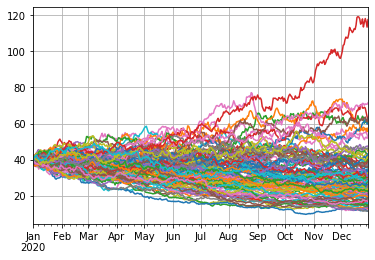

In [43]:
simCloses_OXY.plot(grid=True,legend=False)

In [39]:
simCloses_BAC=data['BAC'].iloc[-1]*(1+sim_BAC).cumprod()
simCloses_BAC

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,34.940783,34.754912,35.073185,35.229071,35.722007,34.660209,34.939702,35.722500,33.966441,35.257824,...,35.889312,35.815810,35.298012,35.450248,36.565065,34.474111,34.845311,35.472835,34.904728,35.394780
2020-01-02,34.987282,35.310511,34.464832,35.707073,35.419015,34.994505,35.721702,35.220406,33.782865,34.303471,...,35.610010,35.125566,35.356183,35.450892,36.424196,33.642832,34.890864,34.010742,34.716891,35.329981
2020-01-03,34.716511,34.892366,33.207815,35.511004,35.729688,35.466276,35.433453,36.753534,33.347963,34.716512,...,35.394527,35.145169,36.184284,35.709473,35.296982,33.811964,35.774600,33.691355,34.846834,36.030573
2020-01-04,34.709758,35.299226,32.935124,35.909522,35.339358,35.127066,35.306871,37.102062,33.559754,34.688586,...,34.861826,35.733218,35.748286,36.006568,34.515488,33.708010,35.845407,34.200139,35.310075,36.037748
2020-01-05,33.946037,35.740064,33.605043,36.324334,35.431553,35.393033,35.644420,37.918916,34.372786,34.596075,...,34.959996,35.862140,35.883559,35.572677,34.126591,32.521942,35.868094,33.660638,35.109613,36.197907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,31.171672,32.111993,43.754685,43.163839,41.026033,38.687064,49.681119,45.449639,28.816736,51.597217,...,35.219928,33.162704,35.079079,53.393779,36.610253,43.735688,27.872842,38.877689,35.044872,18.972850
2020-12-27,31.232291,32.369216,44.205570,43.598954,40.970850,38.628289,49.603142,45.462532,28.058523,50.989978,...,34.973056,33.552767,36.249053,52.716732,37.167894,43.958653,28.211975,38.579747,34.777340,18.880522
2020-12-28,30.574720,32.431391,44.697055,43.904850,39.742764,38.502275,49.583265,45.860627,27.432928,51.405550,...,35.141180,33.323907,36.238248,52.358877,37.696815,44.496103,28.880422,38.390261,33.857012,18.824633
2020-12-29,31.527920,32.345176,44.757033,44.258186,40.557164,38.599550,50.792442,45.129293,26.791837,50.904652,...,35.238805,33.724153,36.608577,51.645899,38.055793,44.576918,28.716243,37.862641,33.978291,18.865418


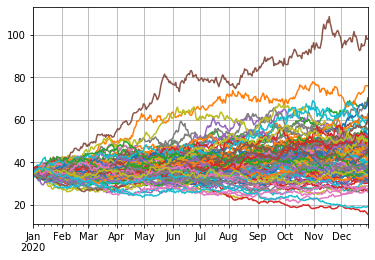

In [44]:
simCloses_BAC.plot(grid=True,legend=False)

In [40]:
simCloses_AMD=data['AMD'].iloc[-1]*(1+sim_AMD).cumprod()
simCloses_AMD

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,45.117855,46.244235,45.527852,43.551568,46.685475,43.525682,45.523700,45.781575,45.900433,47.230948,...,44.526953,46.942680,47.218941,42.010256,46.549017,48.289356,49.180376,44.593905,45.090160,44.336274
2020-01-02,47.126960,45.720459,43.145799,41.853988,46.859101,43.325618,46.085763,43.870149,47.550721,49.040521,...,42.460373,49.694367,47.059585,42.144830,47.246443,50.745265,50.720482,44.745309,46.579313,45.119525
2020-01-03,46.581006,44.462117,43.238699,42.356368,45.070736,42.613792,44.053798,43.554082,44.098692,51.202343,...,42.135246,51.064065,48.734749,42.760583,46.868943,46.639464,52.055903,44.582031,45.839556,44.911273
2020-01-04,45.357725,44.147243,44.149073,43.701575,44.319615,42.452208,45.067734,43.195438,45.268063,49.283414,...,42.939276,50.382711,48.356007,42.466616,47.546647,48.012273,50.777723,44.470090,45.352484,44.121301
2020-01-05,43.882877,46.877456,46.181641,46.391349,43.904469,39.993864,43.448477,45.154698,47.201437,49.942470,...,45.707605,49.267052,47.404614,43.140206,46.679085,49.998414,52.553933,46.186855,44.534650,44.967850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,72.084677,58.728080,139.703604,411.485868,11.032876,286.936100,245.290999,120.580210,120.226531,187.540037,...,241.063208,278.714789,146.500418,71.487450,91.126964,48.098630,85.845602,310.378459,255.748396,86.745538
2020-12-27,69.017215,58.576846,146.883338,439.386921,11.332231,282.463679,243.514054,119.960829,123.788792,192.555647,...,235.730583,280.811419,143.186223,74.098004,94.237591,49.227279,86.677504,333.091454,253.200447,87.565836
2020-12-28,72.856813,58.455373,152.206956,451.139319,11.686138,282.231601,242.128289,128.577476,122.801610,187.780535,...,246.180075,282.172802,137.146066,76.667688,99.085226,48.028065,82.060520,311.848591,275.746797,85.268040
2020-12-29,77.192763,57.128439,144.693717,457.358583,12.080172,298.903466,246.979373,128.313498,124.248299,189.996451,...,253.870912,277.882982,140.817940,77.487940,104.296077,47.182267,84.553938,329.192921,279.357087,87.761069


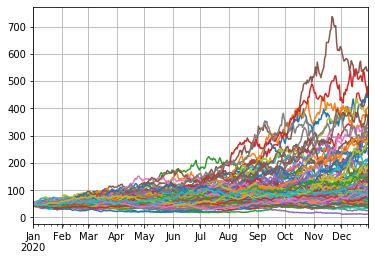

In [45]:
simCloses_AMD.plot(grid=True,legend=False)

In [41]:
simCloses_F=data['F'].iloc[-1]*(1+sim_F).cumprod()
simCloses_F

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2020-01-01,9.281438,9.407056,9.349144,9.038063,9.023501,9.072479,9.339992,9.119248,9.298200,9.252352,...,9.075226,9.290064,8.698253,9.296439,9.153500,9.078650,9.242175,9.181703,9.093079,9.001626
2020-01-02,9.089840,9.208661,9.450234,9.080596,8.704873,8.774611,9.660116,9.375819,9.361788,9.429997,...,9.015060,9.373704,8.621252,9.038678,9.288526,9.159712,9.394900,9.160778,9.294950,9.023180
2020-01-03,8.981383,9.124788,9.423347,9.177944,8.540529,8.776408,9.884216,9.282407,9.261380,9.444668,...,9.109548,9.105243,8.450834,9.124870,9.061307,9.333571,9.526179,9.452591,9.032096,8.938698
2020-01-04,8.875390,9.045867,9.329803,9.108669,8.728539,8.546279,9.608188,9.042150,9.112867,9.375410,...,8.934042,9.195829,8.392026,9.082005,8.905582,9.407697,9.413937,9.340315,8.925654,8.832544
2020-01-05,8.913458,8.998590,9.398581,8.908704,8.731550,8.339363,9.756328,9.134252,9.082011,9.359595,...,8.952314,9.168708,8.297017,9.008245,9.016192,9.428620,9.317243,9.324377,8.708626,8.691680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,7.975177,4.456514,8.240026,11.113867,9.194477,6.072742,10.822366,7.644170,13.286872,6.856054,...,17.828909,9.798001,11.427946,19.385639,5.089487,6.773659,8.794111,14.447481,5.915642,9.742012
2020-12-27,7.994313,4.458974,8.356732,10.757135,9.396106,5.869329,10.777536,7.636933,13.393446,6.932149,...,18.331598,9.642465,11.327152,18.912309,4.882481,6.715649,8.671241,14.834156,5.848318,9.852613
2020-12-28,8.090099,4.456487,8.420948,10.767396,9.135411,5.810807,10.939063,7.737142,13.508695,7.026077,...,18.422652,9.688376,11.315409,18.399418,4.962594,6.837852,8.894840,15.296896,5.812760,9.874512
2020-12-29,8.394079,4.496108,8.492297,10.388819,8.983255,5.977319,10.832472,7.877260,13.275760,7.057820,...,18.552766,9.684285,11.439158,18.290675,5.003284,6.696207,8.989512,15.526239,5.951075,10.077769


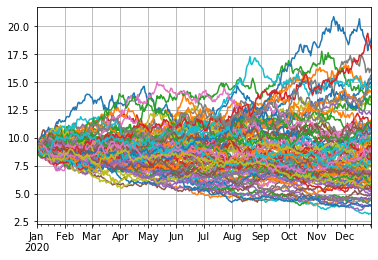

In [57]:
simCloses_F.plot(grid=True,legend=False)

# Visualización de la solución del problema

A continuación se muestrán las gráficas del comportamiento que se dio 
resultado de las simulaciones, además de que podemos ver el código comentado y una comparativa de cada empresa con el resultado de todas las simulaciones.

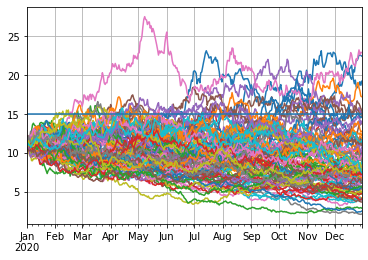

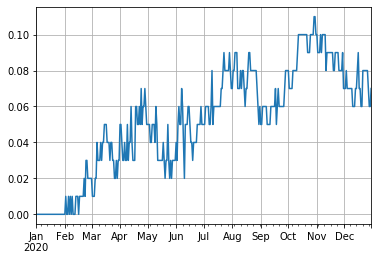

In [60]:
# Umbral de 135% del ultimo precio para GE
Umbral=data['GE'].iloc[-1]*1.35
# Fechas
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
#DF_Umbral
# Concatenar y graficar
simCloses_GE_U=pd.concat([simCloses_GE,DF_Umbral],axis=1)
simCloses_GE_U.plot(grid=True,legend=False)
# Comparar cada escenario en cada fecha
DF_Umbral=simCloses_GE>Umbral
#DF_Umbral
# Sumamos para cada fecha y dividimos entre el número de escenarios
Prob=pd.DataFrame(np.mean(DF_Umbral,axis=1))
# Gráfico de probabilidad
Prob.plot(grid=True,legend=False)

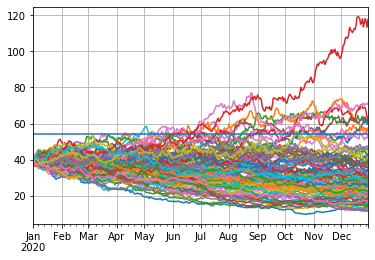

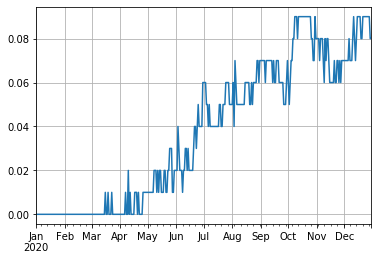

In [61]:
#OXY
Umbral=data['OXY'].iloc[-1]*1.35
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
simCloses_OXY_U=pd.concat([simCloses_OXY,DF_Umbral],axis=1)
simCloses_OXY_U.plot(grid=True,legend=False)
DF_Umbral=simCloses_OXY>Umbral
Prob=pd.DataFrame(np.mean(DF_Umbral,axis=1))
Prob.plot(grid=True,legend=False)

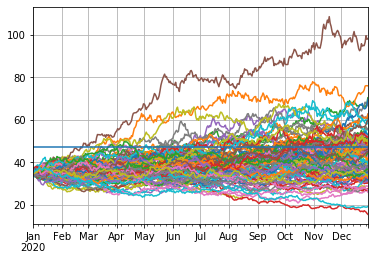

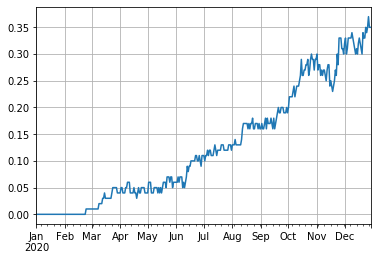

In [62]:
#BAC
Umbral=data['BAC'].iloc[-1]*1.35
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
simCloses_BAC_U=pd.concat([simCloses_BAC,DF_Umbral],axis=1)
simCloses_BAC_U.plot(grid=True,legend=False)
DF_Umbral=simCloses_BAC>Umbral
Prob=pd.DataFrame(np.mean(DF_Umbral,axis=1))
Prob.plot(grid=True,legend=False)

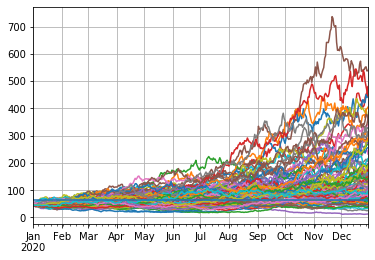

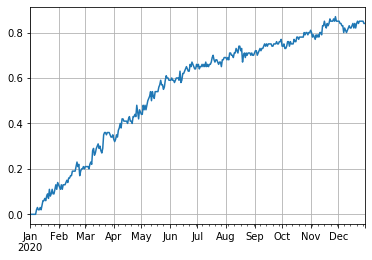

In [63]:
# AMD
Umbral=data['AMD'].iloc[-1]*1.35
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
simCloses_AMD_U=pd.concat([simCloses_AMD,DF_Umbral],axis=1)
simCloses_AMD_U.plot(grid=True,legend=False)
DF_Umbral=simCloses_AMD>Umbral
Prob=pd.DataFrame(np.mean(DF_Umbral,axis=1))
Prob.plot(grid=True,legend=False)

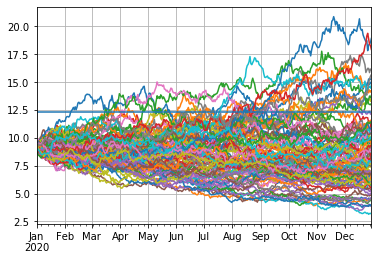

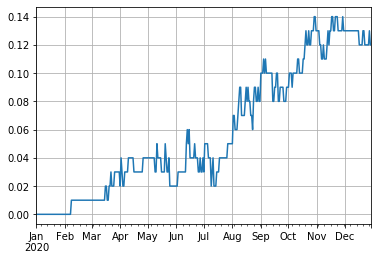

In [64]:
# F
Umbral=data['F'].iloc[-1]*1.35
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
simCloses_F_U=pd.concat([simCloses_F,DF_Umbral],axis=1)
simCloses_F_U.plot(grid=True,legend=False)
DF_Umbral=simCloses_F>Umbral
Prob=pd.DataFrame(np.mean(DF_Umbral,axis=1))
Prob.plot(grid=True,legend=False)

# Conclusiones


Como podemos observar las probabilidades de obtener el rendimieto deseado son casi nulas en algunas de las empresas seleccionadas en el periodo de tiempo de un año, dada esta situación tendríamos que recurrir a ciertos métodos bursátiles para salvar la inversión en caso de que todavía se deseara tener estas empresas como opciones.

Se lograrón hacer las simulaciones y se seleccionó un rendimiento adecuado para nuestro portafolio.

La solución para este portafolio con dichas empresas sería hacer ventas en corto, lo cuál consiste tomar prestadas las acciones de una persona por medio de un contrato, vender esta cara, esperar a que baje el precio de la misma y recuperarla posteriormente, esto para regresar la acción al dueño original y tu quedarte con una ganancia, o en este caso, nuestro cliente.

Como se deseo hacer una inversión a corto plazo se tomó un sólo año de simulación, si hubiese sido uno a largo tuvo que ser de alrededor de 5 años o más.